<a href="https://colab.research.google.com/github/fitriamasruroh/recognition/blob/main/plspm_Corporate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PLSPM
Partial Least Squares Path Modeling (PLS-PM) merupakan salah satu metode analisis data statistik yang termasuk di dalamnya mengunakan pendekatan pengolahan data dengan PLS-SEM (Sanchez, 2013)

**Tiga tahapan proses PLS-PM, sebagai berikut:**


1.   Measurement Model Assessment
2.   Structural Model Assessment
3.   Bootstrapping

# Instalasi library plspm

In [ ]:
pip install plspm

**Import library yang diperlukan dalam analisis**

In [2]:
import pandas as pd, plspm.config as c
from plspm.plspm import Plspm
from plspm.scheme import Scheme
from plspm.mode import Mode
from plspm.bootstrap import Bootstrap

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Persiapan Data

**Mount Google drive and data**

In [ ]:
from google.colab import files
uploaded = files.upload()

**Akses data yang akan diuji**

Note:<br>
*Data yang digunakan dalam penelitian ini diambil dari https://www.smartpls.com/documentation/sample-projects/corporate-reputation<br>
*Ada 11 data yang tidak tersedia (NA, data asli bernilai -99) kita akan gunakan asumsi melengkapi/mengganti nilai -99 data tersebut dengan nilai rata-rata variabel yang sama pada baris data yang tidak tersedia.

In [23]:
df = pd.read_csv('/content/csv.csv') #lokasi file csv
df

,AF1;AF2;AF3;AF4;RA1;RA2;RA3;CM1;CM2;CM3;CM4;CB1;CB2;CB3;MS1;MS2;MS3;EK1;EK2;EK3;CP1;CP2;CT1;CT2;CT3;GS1;GS2;GS3;IR1;IR2;IS1;IS2;IU1;IU2;Y1;Y2;Y3
0,5;5;5;5;4;4;4;5;5;5;5;5;5;5;5;5;5;5;5;5;1;1;5;...
1,5;5;5;5;5;5;5;4;4;4;4;5;5;5;5;5;5;5;5;5;1;1;5;...
2,5;5;5;5;5;5;5;5;5;5;5;5;5;5;5;5;5;5;5;5;1;1;5;...
3,5;5;5;5;5;5;5;5;5;5;5;5;5;5;5;5;5;5;5;5;1;1;5;...
4,4;4;5;4;5;4;5;3;4;3;4;4;4;5;4;4;4;4;4;4;2;1;4;...
...,...
110,5;4;5;4;3;3;3;4;4;4;4;5;5;4;4;5;5;4;5;5;2;2;3;...
111,4;4;5;4;4;3;4;4;4;4;4;4;4;5;4;4;4;4;4;4;2;1;4;...
112,5;5;5;5;5;5;5;5;5;5;5;5;5;5;5;5;5;5;5;5;1;1;5;...
113,5;4;5;4;5;5;4;5;5;5;5;5;5;4;4;5;5;4;5;5;2;2;5;...


# Persiapan model

**Model yang akan diuji**

Gambar di bawah ini adalah model yang akan diuji dengan 4 variabel yaitu COMP, LIKE, CUSA dan CUSL

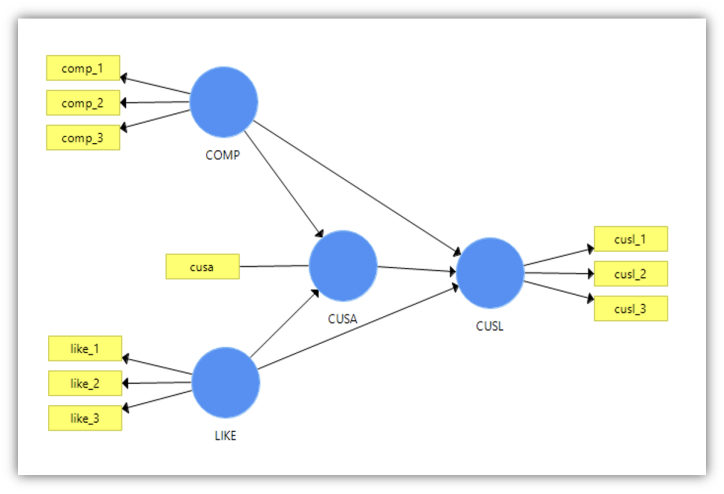

**Inner model**

In [14]:
innerModelSaya = c.Structure()
innerModelSaya.add_path(["Adoption Fee", "Relative Advantage", "Complexity",
                                 "Compatibility", "Management Support",
                                 "Employee Knowledge", "Customer Pressure", "Competitive Pressure",
                                 "Government Support", "Information Retrieval", "Information Sharing",
                                 "Information Use"], ["Social CRM"])

**Outer model**

In [15]:
outerModelSaya = c.Config(innerModelSaya.path(), scaled=False)
outerModelSaya.add_lv_with_columns_named("Adoption Fee", Mode.A, df, "AF") #mengambil data column dengan nama yang diawali "comp_" sebagai data indikator var COMP
outerModelSaya.add_lv_with_columns_named("Complexity", Mode.A, df, "CM")
outerModelSaya.add_lv_with_columns_named("Compatibility", Mode.A, df, "CB")
outerModelSaya.add_lv_with_columns_named("Management Support", Mode.A, df, "MS")
outerModelSaya.add_lv_with_columns_named("Employee Knowledge", Mode.A, df, "EK")
outerModelSaya.add_lv_with_columns_named("Customer Pressure", Mode.A, df, "CP")
outerModelSaya.add_lv_with_columns_named("Competitive Pressure", Mode.A, df, "CT")
outerModelSaya.add_lv_with_columns_named("Government Support", Mode.A, df, "GS")
outerModelSaya.add_lv_with_columns_named("Information Retrieval", Mode.A, df, "IR")
outerModelSaya.add_lv_with_columns_named("Information Sharing", Mode.A, df, "IS")
outerModelSaya.add_lv_with_columns_named("Information Use", Mode.A, df, "IU")
outerModelSaya.add_lv_with_columns_named("Social CRM", "Y", Mode.A, df, "Y")


ValueError: ignored

**Run PLSPM**

In [ ]:
plspm_calc = Plspm(df, outerModelSaya, Scheme.CENTROID)

# Tahap #1 Measurement Model Assessment

# Unidimensionality
apakah indikator mewakili dengan baik variabel yang diukurnya? cronbach alpha > 0.7

In [ ]:
asses_uni = plspm_calc.unidimensionality()
asses_uni

,mode,mvs,cronbach_alpha,dillon_goldstein_rho,eig_1st,eig_2nd
LIKE,A,3.0,0.830987,0.898759,2.242330,0.407392
COMP,A,3.0,0.776028,0.870505,2.076027,0.572377
CUSA,A,1.0,NaN,1.000000,1.000000,NaN
CUSL,A,3.0,0.837582,0.902674,2.267683,0.481876


dari hasil perintah pada tabel di atas tampak bahwa, nilai Cronbach alpha utk semua variabel lebih besar dari 0.7, hal ini menunjukkan bahwa indikator mewakili dengan baik variabel yang diukurnya.

# Pengujian keeratan hubungan dan reliability indikator
Apakah setiap indikator memiliki hubungan dan reliability yang bagus untuk mengukur variabelnya masing-masing? melalui outer loading > 0.7 dan communality test > 0.5

In [ ]:
asses_reliability = plspm_calc.outer_model()
asses_reliability

,weight,loading,communality,redundancy
comp_1,0.377924,0.860963,0.741258,0.000000
comp_2,0.229891,0.788110,0.621117,0.000000
comp_3,0.237378,0.822524,0.676545,0.000000
cusa,0.851370,1.000000,1.000000,0.284711
cusl_1,0.214604,0.822151,0.675933,0.376747
cusl_2,0.263184,0.930769,0.866332,0.482870
cusl_3,0.217895,0.850067,0.722614,0.402766
like_1,0.211192,0.844579,0.713314,0.000000
like_2,0.227209,0.883178,0.780003,0.000000
like_3,0.218723,0.863290,0.745269,0.000000


tabel hasil uji di atas menunjukkan nilai loading dari setiap indikator lebih besar dari 0.7 dan nilai communality di atas 0.5, mengartikan bahwa setiap indikator memiliki hubungan dan reliability yang bagus untuk mengukur variabelnya masing-masing.

# Pengujian cross-loadings
indikator dari setiap variabel mengukur dengan baik variabelnya?

In [ ]:
asses_crossload = plspm_calc.crossloadings()
asses_crossload

,LIKE,COMP,CUSA,CUSL
comp_1,0.598313,0.860963,0.462435,0.461840
comp_2,0.455136,0.788110,0.288672,0.297450
comp_3,0.497286,0.822524,0.274764,0.295866
like_1,0.844579,0.602453,0.506019,0.562040
like_2,0.883178,0.524207,0.429280,0.532913
like_3,0.863290,0.545071,0.414161,0.500733
cusa,0.515039,0.436762,1.000000,0.681516
cusl_1,0.550784,0.433847,0.531796,0.822151
cusl_2,0.578555,0.392608,0.644757,0.930769
cusl_3,0.466793,0.348707,0.591761,0.850067


tabel uji di atas menunjukkan indikator dari setiap variabel mengukur dengan baik variabelnya, terlihat dari tabel loading masing-masing variabel lebih tinggi dibanding di variabel lainnya, terlihat dari angka-angka yang memiliki nilai paling tinggi dalam satu baris, misalnya nilai baris cusl_1, cusl_2 dan cusl_3 pada kolom CUSL memiliki nilai 0.822, 0.930, dan 0.850, paling besar dibanding kolom lainnya.

# Tahap #2 Structural Model Assessment

# Persamaan regresi tiap variabel endogen

In [ ]:
struct_reg = plspm_calc.inner_model()
struct_reg

,from,to,estimate,std error,t,p>|t|
index,,,,,,
LIKE -> CUSA,LIKE,CUSA,0.398897,0.059604,6.692451,9.029620e-11
COMP -> CUSA,COMP,CUSA,0.181481,0.059604,3.044779,2.509677e-03
LIKE -> CUSL,LIKE,CUSL,0.354339,0.049945,7.094630,7.581409e-12
COMP -> CUSL,COMP,CUSL,0.002224,0.047590,0.046728,9.627574e-01
CUSA -> CUSL,CUSA,CUSL,0.498047,0.042662,11.674317,1.041810e-26


# Koefisien determinasi R<sup>2</sup> dan Redundancy
Redundancy, nilai mean_redundancy yang semakin besar menunjukkan kemampuan variabel independent semakin mampu mengukur variasi variabel endogen nya.

In [ ]:
struct_redun = plspm_calc.inner_summary()
struct_redun

,type,r_squared,r_squared_adj,block_communality,mean_redundancy,ave
COMP,Exogenous,0.000000,0.000000,0.679640,0.000000,0.679640
CUSA,Endogenous,0.284711,0.280516,1.000000,0.284711,1.000000
CUSL,Endogenous,0.557373,0.553468,0.754959,0.420794,0.754959
LIKE,Exogenous,0.000000,0.000000,0.746196,0.000000,0.746196


nilai r_squared_adj	CUSL 0.553 menunjukkan bahwa 55.3% variabel CUSL dipengaruhi oleh COMP, LIKE dan CUSA, 44.6% dipengaruhi oleh variabel lainnya di luar model penelitian ini.

# the Goodness-of-Fit (GoF)
Semakin besar nilai GoF menunjukkan semakin bagusnya kinerja dan kualitas secara umum dari model pengukuran baik inner maupun outer model.

In [ ]:
struct_GoF = plspm_calc.goodness_of_fit()
struct_GoF

0.5532350359581404

In [ ]:
print(plspm_calc.effects())

              from    to    direct  indirect     total
LIKE -> CUSA  LIKE  CUSA  0.398897  0.000000  0.398897
LIKE -> CUSL  LIKE  CUSL  0.354339  0.198669  0.553008
COMP -> CUSA  COMP  CUSA  0.181481  0.000000  0.181481
COMP -> CUSL  COMP  CUSL  0.002224  0.090386  0.092610
CUSA -> CUSL  CUSA  CUSL  0.498047  0.000000  0.498047


In [ ]:
print(plspm_calc.path_coefficients())

          LIKE      COMP      CUSA  CUSL
LIKE  0.000000  0.000000  0.000000     0
COMP  0.000000  0.000000  0.000000     0
CUSA  0.398897  0.181481  0.000000     0
CUSL  0.354339  0.002224  0.498047     0


# Tahap #3 Bootstrapping

In [ ]:
plspm_calc = Plspm(df, outerModelSaya, bootstrap=True, bootstrap_iterations=1000)
#jumlah iterasi sesuai kapasitas internet/komputer, ada sedikit perbedaan pd hasil uji

# Direct effects for paths
calculated from bootstrap validation. Tahapan ini dilakukan untuk menguji hipotesis hubungan antar satu variabel ke variabel lainnya dalam model kita. Pada contoh ini ada 5 hipotesis yang akan diuji sesuai dengan gambar model kita di atas, yaitu:

H1: LIKE berpengaruh signifikan pada CUSA<br>
H2: LIKE berpengaruh signifikan pada CUSL<br>
H3: COMP berpengaruh signifikan pada CUSA<br>
H4: COMP berpengaruh signifikan pada CUSL<br>
H5: CUSA berpengaruh signifikan pada CUSL

In [ ]:
plspm_calc.bootstrap().paths() #boot 1000 perlu waktu sekitar 3 menit

,original,mean,std.error,perc.025,perc.975,t stat.
LIKE -> CUSA,0.398897,0.401695,0.058456,0.298801,0.515776,6.823841
LIKE -> CUSL,0.354339,0.355019,0.054949,0.240579,0.466177,6.448484
COMP -> CUSA,0.181481,0.180921,0.065616,0.057925,0.304354,2.765808
COMP -> CUSL,0.002224,0.004261,0.054014,-0.103319,0.115963,0.041171
CUSA -> CUSL,0.498047,0.496524,0.044680,0.405262,0.582631,11.147077


tampak dari hasil di atas COMP tidak berpengaruh signifikan pada CUSL karena ada nilai nol di dalam range nilai perc.025 (-0.1033) dan perc.975 (0.1159) menurut Guderdan et al. (2008) dan Garson (2016), dimana lower percentile (perc.025) bernilai negatif dan upper percentiles (perc.975) bernilai positif, sedangkan pengujian pada 4 hipotesis lainnya disimpulkan LIKE berpengaruh signifikan pada CUSA, LIKE berpengaruh signifikan pada CUSL, COMP berpengaruh signifikan pada CUSA, dan CUSA berpengaruh signifikan pada CUSL.

**R squared (R<sup>2</sup>) for latent variables calculated from bootstrap validation.**

In [ ]:
plspm_calc.bootstrap().r_squared()

,original,mean,std.error,perc.025,perc.975,t stat.
CUSA,0.284711,0.29123,0.040948,0.219016,0.373858,6.953049
CUSL,0.557373,0.56292,0.042100,0.482624,0.643547,13.239296


Loadings of manifest variables calculated from bootstrap validation.

In [ ]:
plspm_calc.bootstrap().loading()

,original,mean,std.error,perc.025,perc.975,t stat.
comp_1,0.860963,0.860841,2.179315e-02,0.814146,0.900109,3.950615e+01
comp_2,0.788110,0.785458,3.110282e-02,0.719580,0.840690,2.533884e+01
comp_3,0.822524,0.817489,3.114508e-02,0.748212,0.868512,2.640943e+01
like_1,0.844579,0.843708,2.205672e-02,0.793492,0.885265,3.829125e+01
like_2,0.883178,0.881949,1.697259e-02,0.843944,0.913624,5.203555e+01
like_3,0.863290,0.861732,1.976990e-02,0.820681,0.895652,4.366688e+01
cusa,1.000000,1.000000,1.148902e-15,1.000000,1.000000,8.703965e+14
cusl_1,0.822151,0.820641,2.620139e-02,0.767296,0.868243,3.137815e+01
cusl_2,0.930769,0.930401,1.010905e-02,0.911470,0.947557,9.207291e+01
cusl_3,0.850067,0.848950,2.668970e-02,0.787876,0.893371,3.185000e+01


Outer weights calculated from bootstrap validation.

In [ ]:
plspm_calc.bootstrap().weights()

,original,mean,std.error,perc.025,perc.975,t stat.
comp_1,0.377924,0.382145,0.033123,0.322218,0.457065,11.409762
comp_2,0.229891,0.230932,0.024861,0.184119,0.284359,9.247006
comp_3,0.237378,0.235340,0.022359,0.188865,0.275114,10.616457
like_1,0.211192,0.212727,0.014247,0.185234,0.240653,14.823515
like_2,0.227209,0.228563,0.013198,0.205074,0.254289,17.215027
like_3,0.218723,0.218863,0.013133,0.193630,0.243299,16.654932
cusa,0.851370,0.853526,0.037434,0.783870,0.933849,22.742990
cusl_1,0.214604,0.214422,0.014936,0.182787,0.242984,14.368063
cusl_2,0.263184,0.263556,0.014118,0.238010,0.293495,18.641915
cusl_3,0.217895,0.218535,0.014896,0.191417,0.249997,14.627725


## References:

Garson, G. D. 2016. Partial Least Squares: Regression and Structural Equation Models. Asheboro, NC: Statistical Associates Publishers.

Gudergan, Siegfried P. & Ringle, Christian M. & Wende, Sven & Will, Alexander, 2008. “Confirmatory tetrad analysis in PLS path modeling,” Journal of Business Research, Elsevier, vol. 61(12), pages 1238-1249, December.

Hair, J. F., Hult, G. T. M., Ringle, C., & Sarstedt, M. (2017). A primer on partial least squares structural equation modeling (PLS-SEM). In SAGE Publications

Sanchez, G. 2013. PLS Path Modeling with R, Trowchez Editions. Berkeley, 2013. https://www.gastonsanchez.com/PLS_Path_Modeling_with_R.pdf

https://plspm.readthedocs.io/en/latest/source/plspm.bootstrap.html

https://pypi.org/project/plspm/

### Project:
Persiapan untuk UAS